# STA 141C Project
- Data cleaning
- Exploratory Data Analysis

In [69]:
# import basic packages for data analysis
import numpy as np
import pandas as pd
import statsmodels.api as sm 
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from sklearn.model_selection import train_test_split, KFold, GridSearchCV

# import the packages/methods that related to the dataset
from ISLP import load_data
# from ISLP.models import ModelSpec as MS, summarize

In [70]:
# Load data
df = pd.read_csv("./north.csv")

In [71]:
# Check first 5 rows
print(df.head(100))

# Get the shape of data
print(df.shape)

# Get the columns of the data
print(df.columns)

    index        Data   Hora  PRECIPITAÇÃO TOTAL, HORÁRIO (mm)  \
0       0  2000-05-09  00:00                           -9999.0   
1       1  2000-05-09  01:00                           -9999.0   
2       2  2000-05-09  02:00                           -9999.0   
3       3  2000-05-09  03:00                           -9999.0   
4       4  2000-05-09  04:00                           -9999.0   
..    ...         ...    ...                               ...   
95     95  2000-05-12  23:00                               0.0   
96     96  2000-05-13  00:00                               0.0   
97     97  2000-05-13  01:00                               0.0   
98     98  2000-05-13  02:00                               0.0   
99     99  2000-05-13  03:00                               0.0   

    PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)  \
0                                             -9999.0       
1                                             -9999.0       
2                       

Given that the column names are in Portugese, it would be ideal to change these names to English for ease of understanding. In addition, there are many -9999 values evident in the first 10 printed rows of the data, which might be indicative of NaN values, which we would be dealing with later on.

In [72]:
# Change column headers to shortened english labels
column_name_english = ['idx', 'date','hour','tPrec','atmosPStatn','prevHrPmax','prevHrPmin','rad','airTemp','dpTemp','prevHrMaxTemp','prevHrMinTemp','prevHrMaxDpTemp','prevHrMinDpTemp','prevHrMaxHum','prevHrMinHum','airHum','windDir','maxWindSp','windSp','reg','state','statn','statnCode','lat','long','height']
df.columns = column_name_english
print(df.head(10))

   idx        date   hour   tPrec  atmosPStatn  prevHrPmax  prevHrPmin   rad  \
0    0  2000-05-09  00:00 -9999.0      -9999.0     -9999.0     -9999.0 -9999   
1    1  2000-05-09  01:00 -9999.0      -9999.0     -9999.0     -9999.0 -9999   
2    2  2000-05-09  02:00 -9999.0      -9999.0     -9999.0     -9999.0 -9999   
3    3  2000-05-09  03:00 -9999.0      -9999.0     -9999.0     -9999.0 -9999   
4    4  2000-05-09  04:00 -9999.0      -9999.0     -9999.0     -9999.0 -9999   
5    5  2000-05-09  05:00 -9999.0      -9999.0     -9999.0     -9999.0 -9999   
6    6  2000-05-09  06:00 -9999.0      -9999.0     -9999.0     -9999.0 -9999   
7    7  2000-05-09  07:00 -9999.0      -9999.0     -9999.0     -9999.0 -9999   
8    8  2000-05-09  08:00 -9999.0      -9999.0     -9999.0     -9999.0 -9999   
9    9  2000-05-09  09:00 -9999.0      -9999.0     -9999.0     -9999.0 -9999   

   airTemp  dpTemp  ...  windDir  maxWindSp  windSp  reg  state   statn  \
0  -9999.0 -9999.0  ...    -9999    -9999.0 

There are object types present in the dataset on top of int and floats. We would need to convert these types to numeric types in order to perform a regression analysis that predicts the temperature.

In [73]:
# Get detailed info of dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8392320 entries, 0 to 8392319
Data columns (total 27 columns):
 #   Column           Dtype  
---  ------           -----  
 0   idx              int64  
 1   date             object 
 2   hour             object 
 3   tPrec            float64
 4   atmosPStatn      float64
 5   prevHrPmax       float64
 6   prevHrPmin       float64
 7   rad              int64  
 8   airTemp          float64
 9   dpTemp           float64
 10  prevHrMaxTemp    float64
 11  prevHrMinTemp    float64
 12  prevHrMaxDpTemp  float64
 13  prevHrMinDpTemp  float64
 14  prevHrMaxHum     int64  
 15  prevHrMinHum     int64  
 16  airHum           int64  
 17  windDir          int64  
 18  maxWindSp        float64
 19  windSp           float64
 20  reg              object 
 21  state            object 
 22  statn            object 
 23  statnCode        object 
 24  lat              float64
 25  long             float64
 26  height           float64
dtypes: float64(1

In [74]:
# Drop irrelavent columns 
df.drop(['idx'],inplace=True, axis=1)
# y = df['airTemp']
# df.drop(['airTemp'],inplace=True, axis=1)

From the below code, we infer that the station code uniquely identifies the station name, given that their numbers are approximately equal. However, for a particular station code, there may be multiple heights, latitudes of longitudes. For this reason, we have decided that variables such as altitude, longitude and height will be sufficient to uniquely identify a particular location, while station code, station name and region can be omitted in our analysis.

In [75]:
# Shows one station can have multiple height variables
df_statnCode_A101 = df[df['statnCode'] == 'A101']
print(df_statnCode_A101['height'].value_counts())

print(df['statnCode'].value_counts())
print(df['height'].value_counts())
print(df['lat'].value_counts())
print(df['long'].value_counts())
print(df['statn'].value_counts())

# Remove non-important columns
df.drop(['statnCode', 'reg', 'state', 'statn' ],inplace=True, axis=1)


61.25    163464
48.79     20424
Name: height, dtype: int64
A101    183888
A201    160224
A202    160128
A009    143496
A010    141648
         ...  
S101     18264
S103     18264
A254     15840
A144     15672
A256      2880
Name: statnCode, Length: 102, dtype: int64
-9999.0    273960
 280.0     244296
 220.0     237744
 96.0      209160
 203.0     167784
            ...  
 199.0      15840
 45.0       15672
 84.8       11664
 84.0        8760
 165.0       2880
Name: height, Length: 146, dtype: int64
-3.103333     163464
-1.300833     151368
-1.410278     139800
-12.615000    132888
-10.183333    123072
               ...  
-1.300875       8760
-9.957844       8760
-12.734862      8760
 0.035000       2880
-8.729722       2880
Name: lat, Length: 193, dtype: int64
-60.016389    163464
-48.438333    139800
-47.930833    139704
-47.871944    132888
-48.300000    123072
               ...  
-51.141899      8760
-49.674956      8760
-49.608215      8760
-51.088889      2880
-49.856389      2

In order to change the date and time to a numerical value, we concatenate the date and time, then covert it to an ordinal value, which is a numerical representation for the date and time. This will be helpful as the traning data are formatted to only include numerical types, which is ideal for model training later on.

In [76]:
df['date_time'] = pd.to_datetime(df['date'] + ' ' +  df['hour'])
df.drop(['date', 'hour' ],inplace=True, axis=1)
df['date_time']=df['date_time'].map(dt.datetime.toordinal)


In [77]:
# Replace all nan values and delete rows with nan values
df = df.replace(to_replace=-9999,value=np.NaN)
df.dropna(inplace=True)

# Create df_temp for data processing via correlation matrix below
df_temp = df.drop(['airTemp'], axis=1)

We then find the correlation matrix and split up the heatmap plots to be able to obtain a better visual representation of the correlations

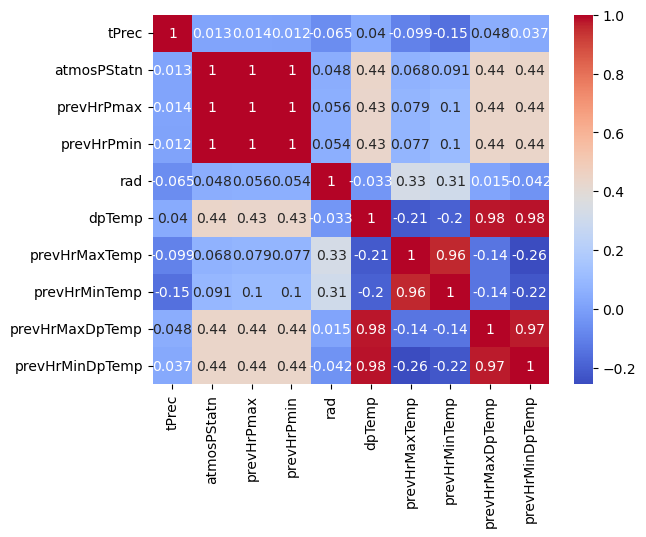

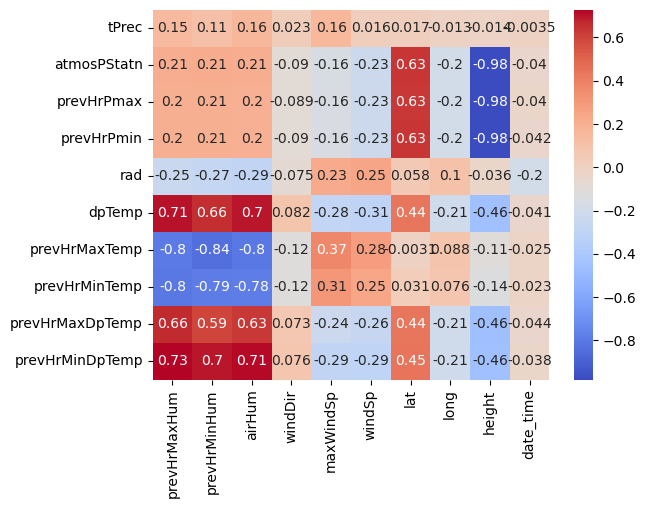

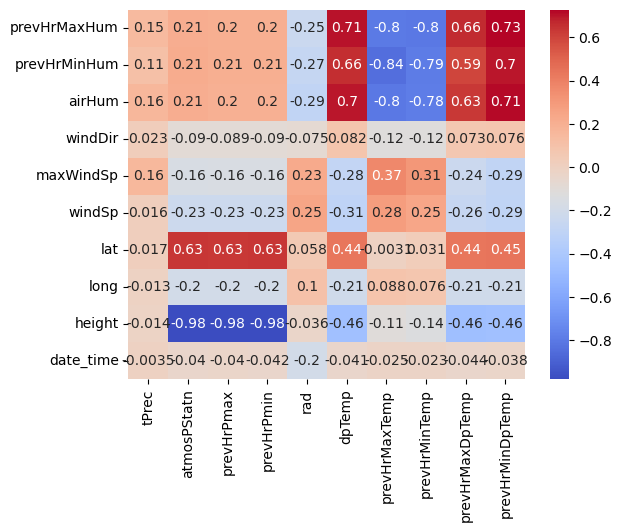

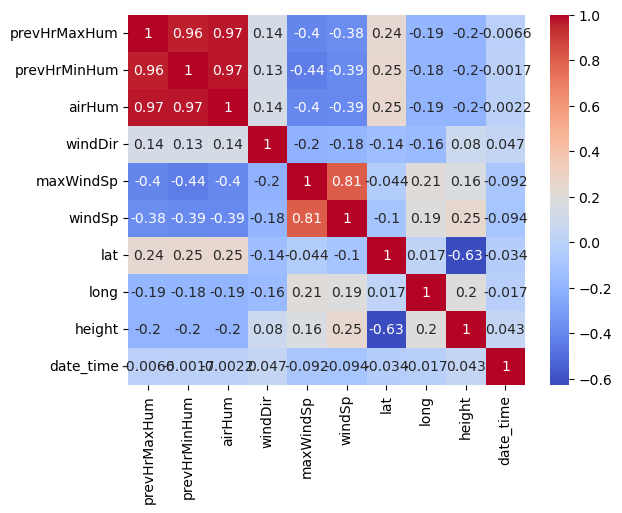

In [79]:
## get the correlation matrix of the data
corr_matrix = df_temp.corr()

# Split up the heatmap plots for better visual comparison
sns.heatmap(corr_matrix.iloc[:10, :10], annot=True, cmap='coolwarm')
plt.show()
sns.heatmap(corr_matrix.iloc[:10, 10:20], annot=True, cmap='coolwarm')
plt.show()
sns.heatmap(corr_matrix.iloc[10:20, :10], annot=True, cmap='coolwarm')
plt.show()
sns.heatmap(corr_matrix.iloc[10:20, 10:20], annot=True, cmap='coolwarm')
plt.show()

We see that atmosPstatn, the atmnospheric pressure at the station level is very highly correlated with prevHrPmin and prevHrPmax, as it is likely that any increases in the prevHrPmin or prevHrPmin would result in corresponding changes in the atmospheric pressure. Thus, we can proceed to omit prevHrPmin and prevHrPmax from our dataframe. Some other examples of high correlation is dewpoint temperature with prevHrMaxDpTemp and prevHrMinDpTemp, which is logical given that the min and max dewpoint temperature range in the previous would significantly influence the current dewpoint temperature, thus we can omit the prevHrMax and Min DpTemp from our dataframe. We will seek to drop variables that has a correlation value of more than 0.8 with another. After the drop operations, we are left with 11 variables

In [ ]:
# Removed as highly correlated with atmosPStatn
df.drop(['prevHrPmin', 'prevHrPmax'],inplace=True, axis=1)

# Removed as highly correlated with dpTemp
df.drop(['prevHrMaxDpTemp', 'prevHrMinDpTemp'],inplace=True, axis=1)

# Removed as highly correlated with prevHrMinTemp
df.drop(['prevHrMaxTemp'], inplace=True, axis=1)

# Removed as highly correlated with dpTemp
df.drop(['prevHrMaxHum', 'prevHrMinHum'],inplace=True, axis=1)

# Removed as highly correlated with windSp
df.drop(['maxWindSp'], inplace=True, axis=1)

# Removed as highly correlated with atmosPStatn
df.drop(['height'], inplace=True, axis=1)

In [82]:
y = df['airTemp']

# Splitting the data
(X_train,
 X_test,
 y_train,
 y_test) = train_test_split(df,
                            y,
                            test_size=0.3,
                            random_state=0)